## Train the model

In [0]:
from fastai.vision import *

In [0]:
folders=['VW GOLF', 'VW TIGUAN', 'VW POLO','VW PASSAT','MERCEDES C-CLASS','SKODA OCTAVIA','AUDI A4','AUDI S4','AUDI RS4','MINI MINI',
        'FORD FOCUS','OPEL CORSA','FORD FIESTA','OPEL ASTRA']

for fld in folders:
    path = Path('/content/data/car')
    dest = path/fld
    dest.mkdir(parents=True, exist_ok=True)
    file = fld+'.csv'
    download_images(path/file, dest, max_pics=200)

In [0]:
classes = folders

In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=2700)

VW GOLF


VW TIGUAN


VW POLO


VW PASSAT


MERCEDES C-CLASS


SKODA OCTAVIA


AUDI A4


AUDI S4


AUDI RS4


MINI MINI


FORD FOCUS


OPEL CORSA


FORD FIESTA


OPEL ASTRA


What does meaning of `vision.data size params?`

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=330, num_workers=4).normalize(imagenet_stats)

In [0]:
data.classes

['AUDI A4',
 'AUDI RS4',
 'AUDI S4',
 'FORD FIESTA',
 'FORD FOCUS',
 'MERCEDES C-CLASS',
 'MINI MINI',
 'OPEL ASTRA',
 'OPEL CORSA',
 'SKODA OCTAVIA',
 'VW GOLF',
 'VW PASSAT',
 'VW POLO',
 'VW TIGUAN']

In [0]:
data.c, len(data.train_ds), len(data.valid_ds)

(14, 1728, 432)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate, wd=0.1)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


## Learn for frozen layers

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


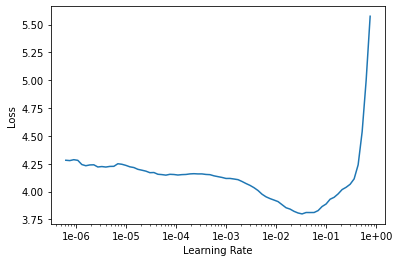

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
lr = 5e-03

In [0]:
learn.fit_one_cycle(10, slice(lr))

epoch,train_loss,valid_loss,error_rate,time
0,3.963122,2.596615,0.831019,00:39
1,3.374514,2.357980,0.706019,00:38
2,2.913610,2.345869,0.678241,00:37
3,2.549535,2.148774,0.648148,00:37
4,2.248918,2.092890,0.648148,00:37
5,1.996371,2.042153,0.615741,00:38
6,1.774333,1.948220,0.590278,00:36
7,1.572691,1.946607,0.592593,00:36
8,1.434129,1.919231,0.585648,00:37
9,1.328343,1.914271,0.585648,00:36


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


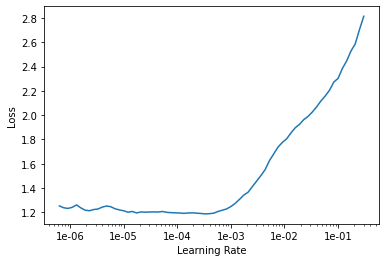

In [0]:
learn.save('stage-1')
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(7, max_lr=slice(5e-05,lr/10))

epoch,train_loss,valid_loss,error_rate,time
0,1.159967,1.864470,0.560185,00:38
1,1.137366,1.932368,0.590278,00:38
2,1.069297,1.810020,0.546296,00:37
3,0.886925,1.717560,0.516204,00:37
4,0.705909,1.696111,0.500000,00:37
5,0.566856,1.698118,0.504630,00:37
6,0.468163,1.675681,0.509259,00:37


In [0]:
learn.save('stage-2')

### GO bigger bigger bigger


In [0]:
tfms = get_transforms(do_flip=True)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=230, train='.', valid_pct=0.2
                                  , num_workers=16, bs=32).normalize(imagenet_stats)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate, wd=0.1)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


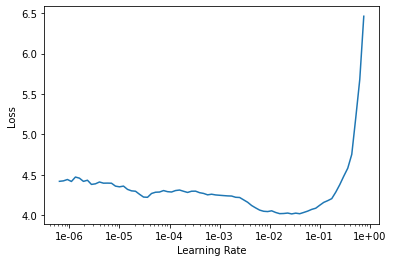

In [0]:
learn.freeze_to(2)
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(8, max_lr=slice(1e-04, 1e-03))

epoch,train_loss,valid_loss,error_rate,time
0,4.160529,3.029967,0.902778,00:26
1,3.599431,2.517697,0.789352,00:25
2,3.056491,2.416231,0.724537,00:25
3,2.684567,2.294681,0.699074,00:25
4,2.378988,2.233369,0.680556,00:25
5,2.115566,2.179857,0.687500,00:25
6,2.020927,2.149548,0.682870,00:25
7,1.935281,2.148147,0.668981,00:25


In [0]:
learn.save('stage-3')

About image size
- [Document](https://docs.fast.ai/vision.data.html)
- [forum](https://forums.fast.ai/t/best-way-to-resize-pictures-for-model-training/28307/22)

In [0]:
learn.load('stage-3')

Learner(data=ImageDataBunch;

Train: LabelList (1728 items)
x: ImageList
Image (3, 230, 230),Image (3, 230, 230),Image (3, 230, 230),Image (3, 230, 230),Image (3, 230, 230)
y: CategoryList
FORD FIESTA,FORD FIESTA,FORD FIESTA,FORD FIESTA,FORD FIESTA
Path: /content/data/car;

Valid: LabelList (432 items)
x: ImageList
Image (3, 230, 230),Image (3, 230, 230),Image (3, 230, 230),Image (3, 230, 230),Image (3, 230, 230)
y: CategoryList
SKODA OCTAVIA,MINI MINI,AUDI RS4,AUDI RS4,AUDI S4
Path: /content/data/car;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): B

In [0]:
from fastai.callbacks.hooks import *
from fastai.utils.mem import *
free = gpu_mem_get_free_no_cache()
free

14085

In [0]:
src=ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, bs=64,
                               ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
#attribute error
# data = (src.transform(get_transforms()
#         # , size=size
#         ,)
#         .databunch(bs=bs)
#         .normalize(imagenet_stats))

In [0]:
learn = cnn_learner(src, models.resnet34, metrics=error_rate)

In [0]:
learn.load('stage-3')

Learner(data=ImageDataBunch;

Train: LabelList (1728 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
FORD FIESTA,FORD FIESTA,FORD FIESTA,FORD FIESTA,FORD FIESTA
Path: /content/data/car;

Valid: LabelList (432 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
OPEL ASTRA,SKODA OCTAVIA,OPEL CORSA,FORD FOCUS,VW TIGUAN
Path: /content/data/car;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 9.12E-03
Min loss divided by 10: 6.31E-08


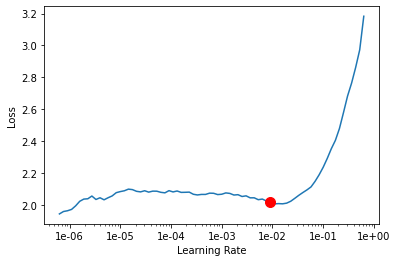

In [0]:
lr_find(learn)
learn.recorder.plot(suggestion=True)

In [0]:
learn.fit_one_cycle

In [0]:
lr =1.58E-04
learn.fit_one_cycle(10, slice(lr), pct_start=0.8)

In [0]:
learn.save('stage-1-big', return_path=True)

PosixPath('/content/data/car/models/stage-1-big.pth')

In [0]:
learn.load('stage-1-big');

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.98E-06
Min loss divided by 10: 1.32E-05


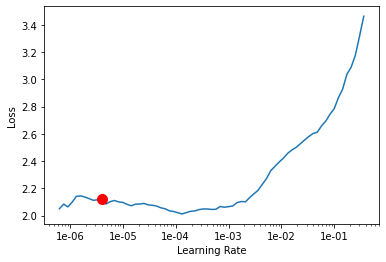

In [0]:
lr_find(learn)
learn.recorder.plot(suggestion=True)

In [0]:
lrs = slice(3.98E-06)
learn.fit_one_cycle(10, lrs)

epoch,train_loss,valid_loss,error_rate,time
0,1.521991,1.512092,0.486111,00:21
1,1.534946,1.514958,0.469907,00:21
2,1.515287,1.508516,0.479167,00:22
3,1.525983,1.510485,0.481481,00:22
4,1.532280,1.509207,0.481481,00:22
5,1.519410,1.506735,0.479167,00:22
6,1.531836,1.504869,0.474537,00:22
7,1.522347,1.503509,0.465278,00:22
8,1.508124,1.506014,0.481481,00:21
9,1.524030,1.504137,0.479167,00:22


In [0]:
learn.save('stage-4')

In [0]:
data2=ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, bs=16,
                               ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
learn = cnn_learner(src, models.resnet34, metrics=error_rate)
learn.load('stage-4')

Learner(data=ImageDataBunch;

Train: LabelList (1728 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
FORD FIESTA,FORD FIESTA,FORD FIESTA,FORD FIESTA,FORD FIESTA
Path: /content/data/car;

Valid: LabelList (432 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
OPEL ASTRA,SKODA OCTAVIA,OPEL CORSA,FORD FOCUS,VW TIGUAN
Path: /content/data/car;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.75E-06
Min loss divided by 10: 2.29E-05


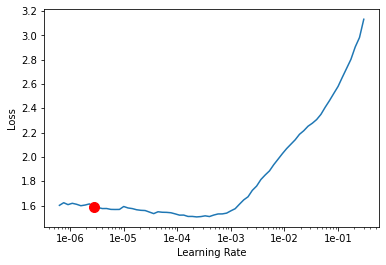

In [0]:
learn.unfreeze()
lr_find(learn)
learn.recorder.plot(suggestion=True)

In [0]:
lr =2.75E-06
learn.fit_one_cycle(10, slice(lr), pct_start=0.8)

epoch,train_loss,valid_loss,error_rate,time
0,1.594326,1.510985,0.481481,00:21
1,1.570647,1.500786,0.467593,00:21
2,1.532469,1.503602,0.472222,00:21
3,1.525665,1.504664,0.474537,00:21
4,1.517714,1.501875,0.465278,00:21
5,1.520520,1.502261,0.481481,00:21
6,1.514462,1.502158,0.476852,00:21
7,1.518446,1.504904,0.481481,00:20
8,1.534958,1.505540,0.476852,00:21
9,1.545334,1.498585,0.483796,00:20


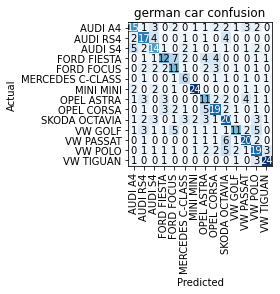

In [0]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(title='german car confusion')

In [0]:
learn.load('stage-4')

Learner(data=ImageDataBunch;

Train: LabelList (1728 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
FORD FIESTA,FORD FIESTA,FORD FIESTA,FORD FIESTA,FORD FIESTA
Path: /content/data/car;

Valid: LabelList (432 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
OPEL ASTRA,SKODA OCTAVIA,OPEL CORSA,FORD FOCUS,VW TIGUAN
Path: /content/data/car;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (

In [0]:
tfms = get_transforms(do_flip=True)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=224, train='.', valid_pct=0.2
                                  , num_workers=16, bs=32).normalize(imagenet_stats)
learn = cnn_learner(data, models.resnet34, metrics=error_rate, wd=0.1)

In [0]:
learn.load('stage-4')

Learner(data=ImageDataBunch;

Train: LabelList (1728 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
FORD FIESTA,FORD FIESTA,FORD FIESTA,FORD FIESTA,FORD FIESTA
Path: /content/data/car;

Valid: LabelList (432 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
FORD FOCUS,AUDI A4,OPEL ASTRA,FORD FOCUS,MINI MINI
Path: /content/data/car;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): 

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 7.59E-05
Min loss divided by 10: 7.59E-08


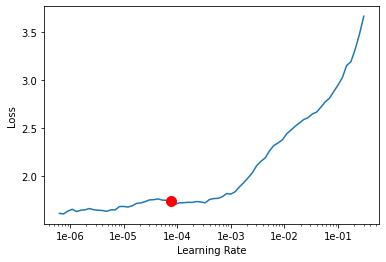

In [0]:
learn.unfreeze()
lr_find(learn)
learn.recorder.plot(suggestion=True)

In [0]:
lr = 7.59E-05
learn.fit_one_cycle(13, slice(lr), pct_start=0.8)

epoch,train_loss,valid_loss,error_rate,time
0,1.742759,1.039247,0.319444,00:29
1,1.702948,1.039836,0.314815,00:28
2,1.682719,1.027358,0.307870,00:28
3,1.671235,1.033636,0.307870,00:29
4,1.660185,1.015030,0.296296,00:28
5,1.597832,1.021645,0.307870,00:28
6,1.512221,1.019170,0.300926,00:28
7,1.508917,1.026474,0.307870,00:28
8,1.433393,1.030724,0.317130,00:28
9,1.404082,1.038364,0.335648,00:28


In [0]:
example = torch.rand(2, 3, 224, 224) #\\ dummy batch size, n_chanels, w, h
learn.model.training = False # disable dropout
learn.model = learn.model.cpu() # move to CPU
traced_script_module = torch.jit.trace(learn.model, example)
traced_script_module.save("./data/car/model.pt")

In [0]:
!pwd

/content
